# Анализ имён

In [87]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline
import os
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [89]:
PATH = 'babynames/'
df = pd.DataFrame(columns=['name','sex','num','year'])
for filename in os.listdir(PATH):
    with open(PATH + filename, 'r') as f:
        df_t = pd.read_csv(f, names = ['name','sex','num'])
        df_t['year'] = filename[3:7]
        df = df.append(df_t)

In [91]:
df.head()

,name,sex,num,year
0,Mary,F,7065.0,1880
1,Anna,F,2604.0,1880
2,Emma,F,2003.0,1880
3,Elizabeth,F,1939.0,1880
4,Minnie,F,1746.0,1880


## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

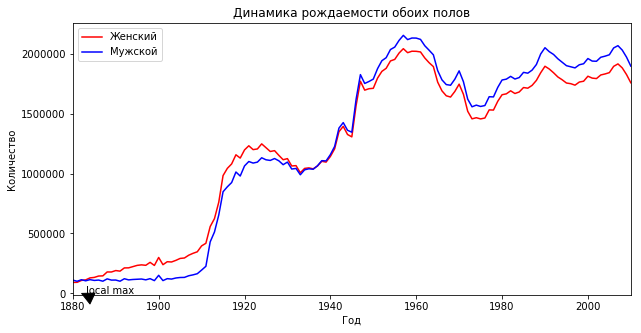

In [118]:
table = pd.pivot_table(df, index='year', values='num', columns='sex', aggfunc=sum)
table['F'].plot(figsize=(10, 5), legend=True, label='Женский', color='red')
table['M'].plot(figsize=(10, 5), legend=True, label='Мужской', color='blue')
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.ylabel('Количество');
plt.xlabel('Год');
plt.title('Динамика рождаемости обоих полов')

## Найдите самые популярные имена за всю историю

In [ ]:
df[df.sex == 'M']['num'].value_counts()
